In [100]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

In [101]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from definitions import ROOT_DIR

ROOT_DIR

'D:\\_Semester8\\Tugas Akhir\\GED\\cfg-grader'

In [102]:
# Global constant variable declarations

def get_file(filename):
    return os.path.join(ROOT_DIR, "datasets", "csv", filename)

FILE_NAMES = ['segiempat', 'countvokal', 'empatinteger']
MAP_FILE_NAMES = {
    'segiempat': 'Persoalan Segiempat',
    'countvokal': 'Persoalan Count Vokal',
    'empatinteger': 'Persoalan Empat Integer',
    'all': 'Merged'
}
OLD_X_AXIS = 'old_wb_score'
X_AXIS = 'new_wb_score'
Y_AXIS = 'bb_score'
EPS = 0.001

In [103]:
# Read files
dataframes = {}
for name in FILE_NAMES:
    dataframes[name] = pd.read_csv(get_file(f'{name}.csv'))
dataframes['all'] = pd.concat([df for df in dataframes.values()])

In [104]:
# Correlation function
def correlation(df):
    return df.corr()

In [105]:
# MAE (Mean Absolute Error) function
def mae(df, x_axis, y_axis):
    return mean_absolute_error(df[x_axis], df[y_axis])

In [106]:
# Linear Regression Plot function
def linear_regression_plot(name, df, x_axis, y_axis):
    m, b = np.polyfit(df[x_axis], df[y_axis], 1)
    fig, ax = plt.subplots(figsize=(8, 8), dpi=60)
    ax.scatter(df[x_axis], df[y_axis])
    ax.set_title(f'Perbandingan Hasil Penilaian Menggunakan Black Box Grader dan \nWhite Box Grader {name}')
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_aspect(1)
    ax.plot(df[y_axis], m * df[y_axis] + b)
    plt.show()

In [107]:
# Confusion Matrix Plot function
def confusion_matrix_plot(name, df, x_axis, y_axis):
    y_bins = [10 * x - EPS for x in range(11)] + [100 + EPS]
    x_bins = [0 - EPS] + [10 * x + EPS for x in range(11)]
    labels = range(11)
#     y_bins = [100 * x - EPS for x in range(2)] + [100 + EPS]
#     x_bins = [0 - EPS, 70 + EPS, 100 + EPS]
#     labels = range(2)

    cat_X = pd.cut(df[x_axis], bins=x_bins, labels=labels)
    cat_Y = pd.cut(df[y_axis], bins=y_bins, labels=labels)
    categorized_grade = pd.concat([cat_X, cat_Y], axis=1)
    
    cm = confusion_matrix(categorized_grade[x_axis], categorized_grade[y_axis], labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=60)
    ax.set_title(f'Confusion Matrix Perbandingan Hasil Penilaian Menggunakan Black Box Grader\n dan White Box Grader {name}')
    disp.plot(ax=ax)
    disp.ax_.set(xlabel=y_axis, ylabel=x_axis)
    plt.show()

In [108]:
# Print Correlations
for name, df in dataframes.items():
    print(f'Correlation of dataframe {name} exam:\n', correlation(df), '\n-----\n')

Correlation of dataframe segiempat exam:
               bb_score  old_wb_score  new_wb_score
bb_score      1.000000      0.335836      0.402854
old_wb_score  0.335836      1.000000      0.790605
new_wb_score  0.402854      0.790605      1.000000 
-----

Correlation of dataframe countvokal exam:
               bb_score  old_wb_score  new_wb_score
bb_score      1.000000      0.188912      0.506142
old_wb_score  0.188912      1.000000      0.489415
new_wb_score  0.506142      0.489415      1.000000 
-----

Correlation of dataframe empatinteger exam:
               bb_score  old_wb_score  new_wb_score
bb_score      1.000000      0.072445      0.191516
old_wb_score  0.072445      1.000000      0.238936
new_wb_score  0.191516      0.238936      1.000000 
-----

Correlation of dataframe all exam:
               bb_score  old_wb_score  new_wb_score
bb_score      1.000000      0.146758      0.190744
old_wb_score  0.146758      1.000000      0.362302
new_wb_score  0.190744      0.362302      1.0

In [109]:
# Print MAE
for name, df in dataframes.items():
    print(f'MAE (Mean Absolute Error) of dataframe {name} exam: {mae(df, X_AXIS, Y_AXIS)}')
    print(f'MAE (Mean Absolute Error) of dataframe {name} exam: {mae(df, OLD_X_AXIS, Y_AXIS)}')

MAE (Mean Absolute Error) of dataframe segiempat exam: 16.446714479524434
MAE (Mean Absolute Error) of dataframe segiempat exam: 23.634718276341786
MAE (Mean Absolute Error) of dataframe countvokal exam: 10.469388672943827
MAE (Mean Absolute Error) of dataframe countvokal exam: 18.977875934119858
MAE (Mean Absolute Error) of dataframe empatinteger exam: 31.6352678422156
MAE (Mean Absolute Error) of dataframe empatinteger exam: 24.699443707774634
MAE (Mean Absolute Error) of dataframe all exam: 19.912280540242044
MAE (Mean Absolute Error) of dataframe all exam: 22.511110029322467


Linear Regression Plot of segiempat exam:


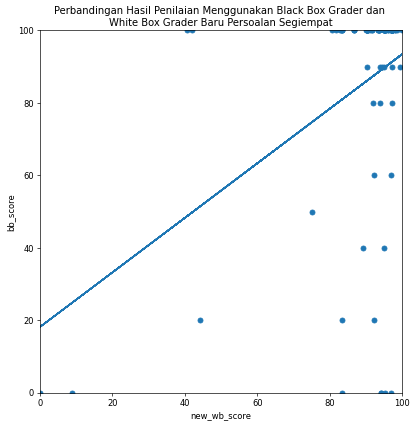

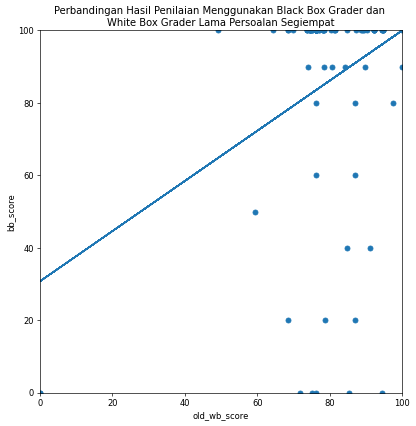

Linear Regression Plot of countvokal exam:


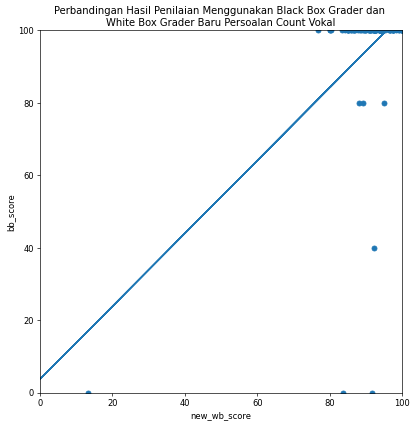

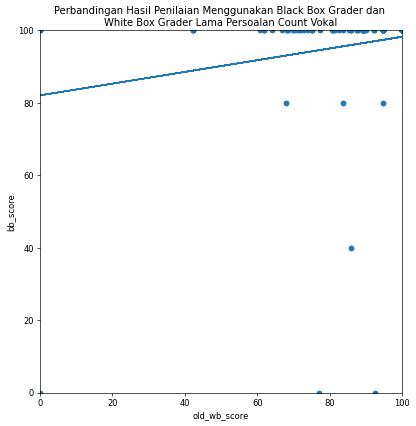

Linear Regression Plot of empatinteger exam:


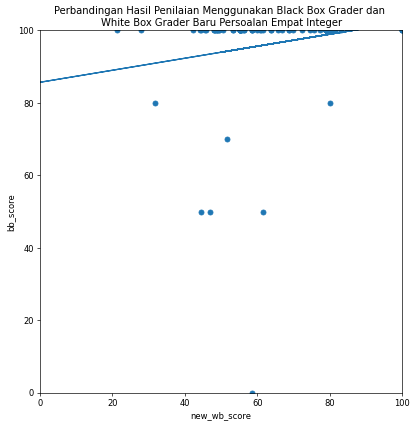

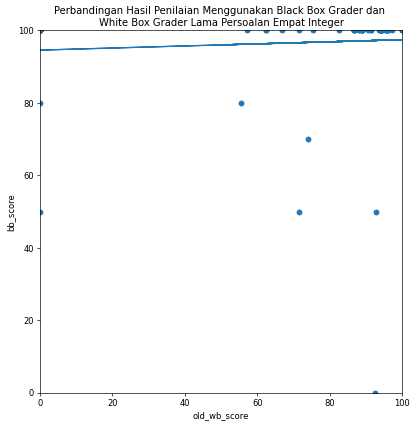

Linear Regression Plot of all exam:


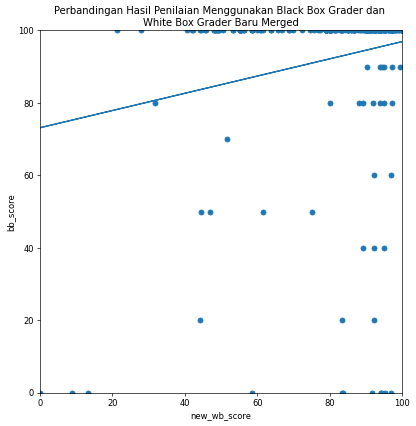

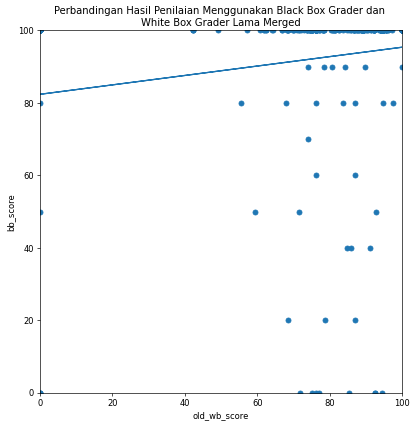

In [110]:
# Show Linear Regression Plot
for name, df in dataframes.items():
    print(f'Linear Regression Plot of {name} exam:')
    linear_regression_plot(f'Baru {MAP_FILE_NAMES[name]}', df, X_AXIS, Y_AXIS)
    linear_regression_plot(f'Lama {MAP_FILE_NAMES[name]}', df, OLD_X_AXIS, Y_AXIS)

In [ ]:
# Show Confusion Matrix Plot
for name, df in dataframes.items():
    print(f'Confusion Matrix Plot of {name} exam:')
    confusion_matrix_plot(f'Baru {MAP_FILE_NAMES[name]}', df, X_AXIS, Y_AXIS)
    confusion_matrix_plot(f'Lama {MAP_FILE_NAMES[name]}', df, OLD_X_AXIS, Y_AXIS)

Confusion Matrix Plot of segiempat exam:
